In [179]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [278]:
%matplotlib inline  
#%matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + '_BoB'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1


In [279]:
#specify the grid

#xmin, xmax = (-126,-121)
#ymin, ymax = (36.25,38.5)

In [283]:
#file = '../Data/dataset-duacs-nrt(7:10:219).nc'
#directory = '../Data/*.nc'
#file = '../Data1/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1641856959851.nc'
#file = '../Data1/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1641857037190.nc'
directory = '../Data1/*.nc'

In [284]:
#ds = xr.open_dataset(file)
ds = xr.open_mfdataset(directory)

In [285]:
ds

<xarray.Dataset>
Dimensions:    (time: 2, latitude: 82, longitude: 81)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-10 2019-07-22
  * latitude   (latitude) float64 4.875 5.125 5.375 5.625 ... 24.62 24.88 25.12
  * longitude  (longitude) float64 79.88 80.12 80.38 80.62 ... 99.38 99.62 99.88
Data variables:
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(2, 82, 81), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(2, 82, 81), meta=np.ndarray>
    crs        int32 ...
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(2, 82, 81), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2020-12-31T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2020-12-30T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [188]:
longitude = ds.longitude
latitude = ds.latitude
ugos = ds.ugos
vgos = ds.vgos

In [189]:
#longitude = np.arange(-10, 10, 1)
#latitude = np.arange(-10, 10, 1)
longitude = np.meshgrid(longitude, sparse=True)
latitude = np.meshgrid(latitude, sparse=True)

u, v = np.meshgrid(ugos, vgos)

In [211]:
longitude = np.transpose(longitude)
latitude = np.transpose(latitude)

ValueError: X and Y must be the same size, but X.size is 1 and Y.size is 81.

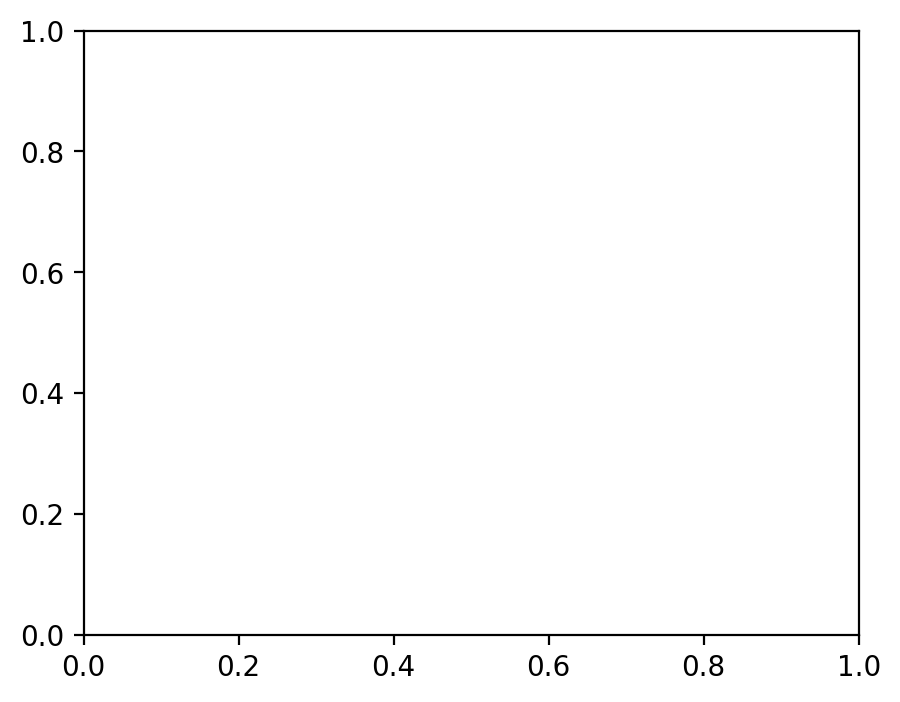

In [214]:
fig, ax = plt.subplots()
q = ax.quiver(longitude, latitude, u, v)

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_55264/3483492928.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


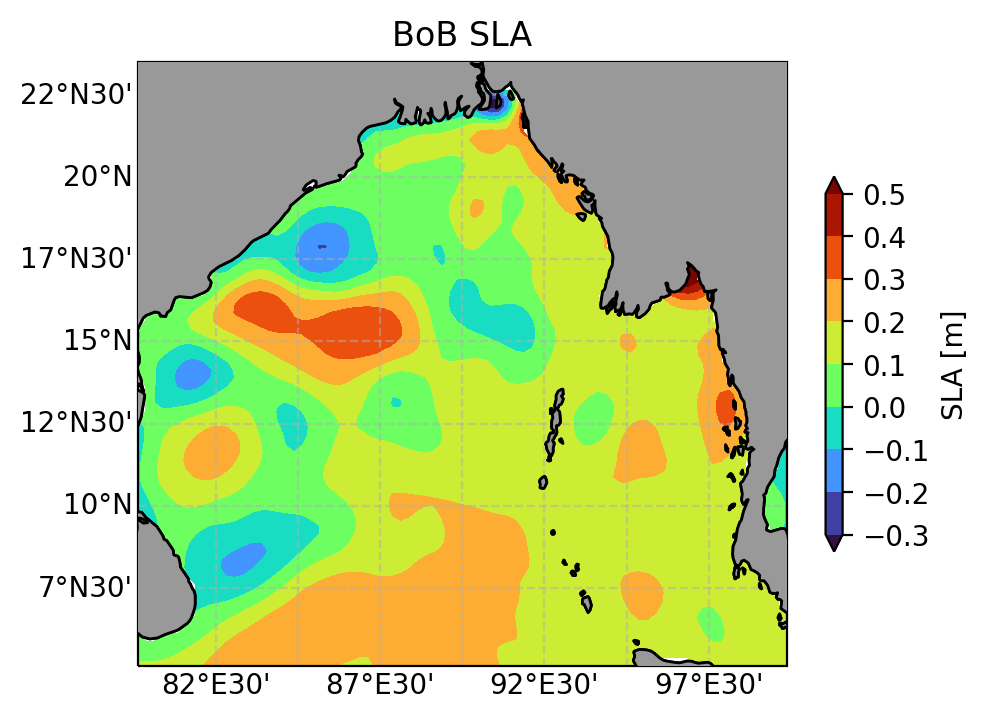

In [256]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
#set the size of the axis
#extent = [xmin, xmax, ymin, ymax]
#ax.set_title('Sea level anomaly (DUACS)')

plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

if savefig:

    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

In [651]:
sla = ds.sla

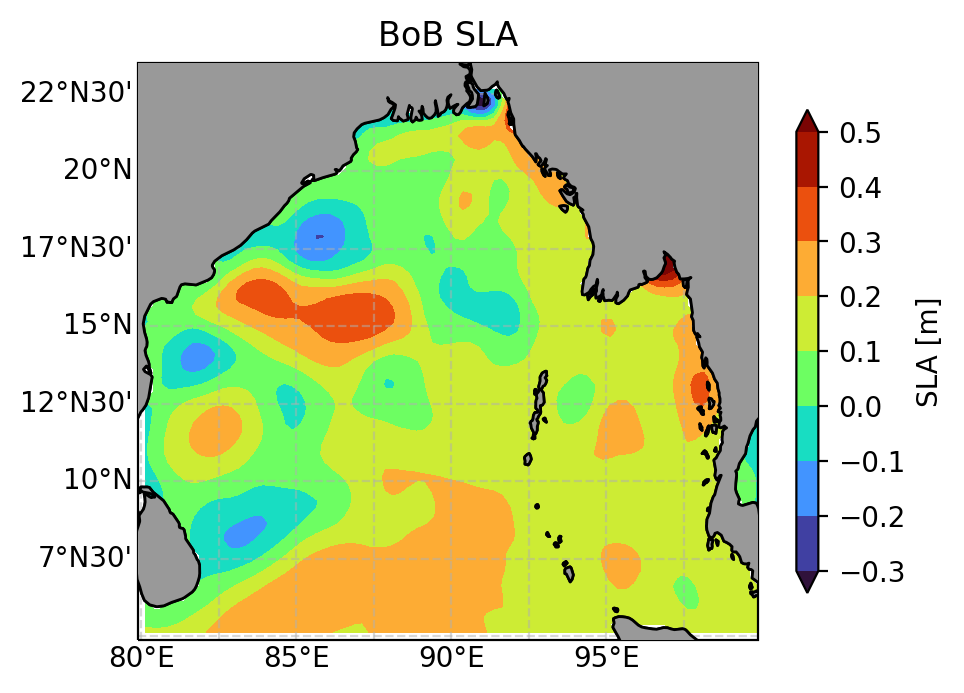

In [664]:
timeindex = 0
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_55264/2877648779.py:13: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


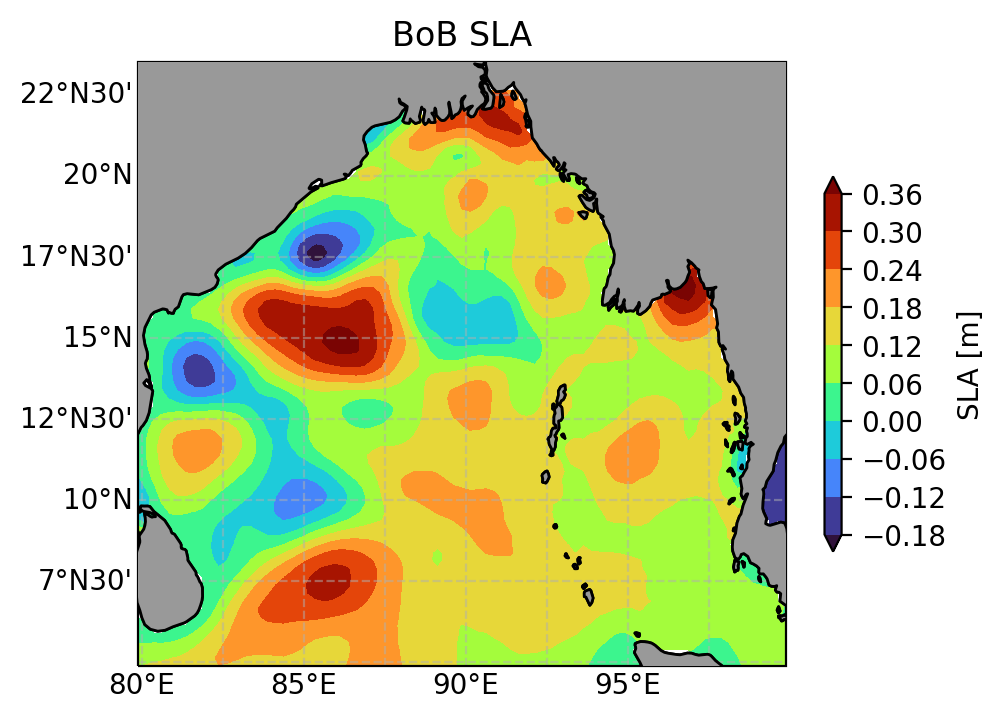

In [670]:
timeindex = 1
ax1 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax1.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax1.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
